In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNetCV, ElasticNet, Ridge
from sklearn.model_selection import learning_curve, ShuffleSplit
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
n_samples = 500
n_features = 500
all_inputs = np.random.randn(n_samples, n_features)

# Добавляем линейную комбинацию
w_true = np.zeros(n_features)
w_true[:2] = 1.
y = np.dot(all_inputs, w_true)

X = all_inputs[:, 1:]

In [5]:
X

array([[ 0.78205101,  1.68457031, -0.22291333, ..., -0.82015509,
        -0.39156175,  2.03588935],
       [-1.56837335,  0.40784407,  0.67406435, ..., -0.09448745,
        -1.57940054, -1.25313789],
       [-0.30578021,  1.38215804, -0.79960753, ...,  0.42102322,
        -0.61443756,  0.74328597],
       ...,
       [-0.60659185, -0.135807  , -0.32871486, ..., -0.05187075,
         0.36761963, -0.13732678],
       [ 0.04108684,  0.84638114, -1.50446562, ...,  0.24731785,
         0.23937742, -1.07677697],
       [ 1.09720608, -0.23174508, -1.04328701, ..., -0.60659089,
        -0.55531603, -0.27871543]])

In [6]:
#выведите форму y
y.shape

(500,)

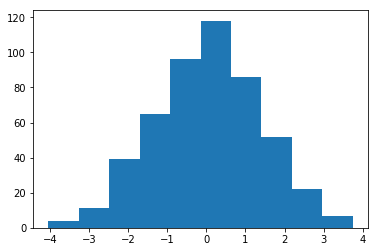

In [9]:
#постройте гистограмму для y
plt.hist(y)
plt.show()

In [10]:
#выведите форму X
X.shape

(500, 499)

In [11]:
gs_ridge = GridSearchCV(Ridge(), {'alpha': np.logspace(-6, 2, 20)},
                        scoring='neg_median_absolute_error', cv=10).fit(X, y)

In [12]:
gs_ridge.best_params_

{'alpha': 100.0}

In [13]:
gs_ridge.best_score_

-0.9958549506523908

In [14]:
enet_params = {
    'alpha': np.logspace(-6, -1, 6),
    'l1_ratio': [0.1, 0.2, 0.3],
}
gs_enet = GridSearchCV(ElasticNet(max_iter=10000), enet_params,
                       scoring='neg_median_absolute_error', cv=10, n_jobs=10)
gs_enet.fit(X, y);

In [15]:
#выведите лучший скор и лучшие параметры для enet
gs_enet.best_score_

-0.7644639425556989

In [16]:
gs_enet.best_params_

{'alpha': 0.1, 'l1_ratio': 0.3}

In [17]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,
        scoring='neg_median_absolute_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

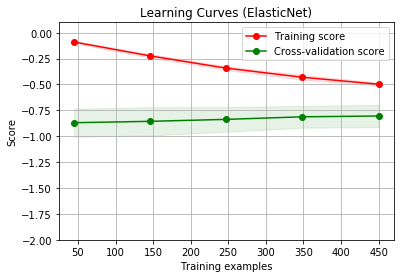

In [18]:
title = "Learning Curves (ElasticNet)"
cv = ShuffleSplit(n_splits=50, test_size=0.1, random_state=0)
enet = ElasticNet(alpha=1e-1, l1_ratio=0.3, max_iter=10000)
plot_learning_curve(enet, title, X, y, ylim=(-2, 0.1), cv=cv, n_jobs=4);

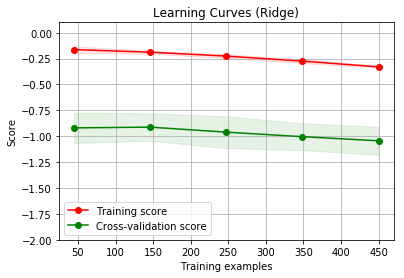

In [19]:
#постройте аналогичную ElasticNet визуализацию для Ridge
title = "Learning Curves (Ridge)"
cv = ShuffleSplit(n_splits=50, test_size=0.1, random_state=0)
ridge = Ridge(alpha=100)
plot_learning_curve(ridge, title, X, y, ylim=(-2, 0.1), cv=cv, n_jobs=4);